In [9]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
class Neural_Network:
    '''
    This Neural Network class builds the network's nodes and layers.
    It using stochastic gradient to train the training data.
    Compute the trained weights and biases.
    Compute evaluation on testing data.
    '''
    def __init__(self, net):
        # Builds the network with the net's length is the layer 
        # and elements' value as number of nodes
        self.layers = len(net)
        self.net = net
        self.biases = [np.random.randn(k,1) for k in net[1:]]
        self.weights = [np.random.randn(j,k) for k,j in zip(net[:-1], net[1:])]
        self.c = []
        self.iterate = 0
        
    def cross_validation(self, data , epochs = 15, mini_batch_size = 10, lr = 1.0):
        fold = np.int(data*0.1)
        for i in range(0, len(data), fold):
            validation_data = data[i:i+fold]
            training_data = data[i+fold:]
            
    
    def SGD(self, data , epochs = 15, mini_batch_size = 10, lr = 1.0):
        # SGD randomly shuffle the training data
        # split training data into batches with mini batch size
        # train each batch in batches and update the weights and biases
        split = np.floor(len(data)/mini_batch_size)
        for x in range(epochs):
            np.random.shuffle(data)
            batches = [data[i:i+mini_batch_size] for i in range(0,len(data),mini_batch_size)]
            
            for batch in batches:
                self.mini_batch_update(batch,lr)
            print("epochs: {}/{}".format(x+1, epochs))
                
    def mini_batch_update(self, batch, lr):
        # Train each batch in batches and update the weights and biases
        # Compute the gradient for each weights and biases
        delta_w = [np.zeros(w.shape) for w in self.weights]
        delta_b = [np.zeros(b.shape) for b in self.biases]
        
        # For each training data in batch compute gradient using the backpropagate 
        # Sum the gradient for each weights and biases
        for i in range(len(batch)):
            input_node = batch[i][0]
            output_node = batch[i][1]
            d_w, d_b = self.backpropagate(input_node, output_node)  
            delta_w = [(w1+w2)for w1,w2 in zip(delta_w,d_w)]
            delta_b = [(b1+b2) for b1,b2 in zip(delta_b, d_b)]
        # Update the weights and biases with learning rate and the gradient
        self.weights = [(w-((lr/len(batch))*d_w)) for w,d_w in zip(self.weights,delta_w)]
        self.biases = [(b-((lr/len(batch))*d_b)) for b, d_b in zip(self.biases, delta_b)] 

    def backpropagate(self, x, y):
        # Take in a single training data
        # backpropagate
        # output gradient from a single training data
        d_w = [np.zeros(w.shape) for w in self.weights]
        d_b = [np.zeros(b.shape) for b in self.biases]
        z_nodes, a_nodes = self.feedforward(x) # output/activation nodes
        if (self.iterate%1000 == 0): 
            self.cost(a_nodes[-1], y)
        output_e = self.delta_cost(a_nodes[-1], y)*self.d_sigmoid(z_nodes[-1]) # output error
        d_w[-1] = np.dot(output_e, a_nodes[-2].transpose()) 
        d_b[-1] = output_e
        
        for l in range(2,self.layers):
            output_e = np.dot(self.weights[-l+1].transpose(),output_e)*self.d_sigmoid(z_nodes[-l])
            d_w[-l] = np.dot(output_e, a_nodes[-l-1].transpose())
            d_b[-l] = output_e
        self.iterate += 1
        return d_w, d_b 
                  
    def feedforward(self, input_node):
        # Take in a training example
        # output the z and a for each layer
        node = input_node
        z = []
        a = [node]
        for w,b in zip(self.weights, self.biases):
            node = np.dot(w, node)+b
            z.append(node)
            node = self.sigmoid(node)
            a.append(node)
        return z, a
    
    def cost(self, output_node, label):
        # Cost/Loss
        co = 1/2*(output_node-label)**2
        self.c.append(co.mean())
    
    def delta_cost(self,output_node, label):
        error = (output_node-label)
        return error
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        a = 1.0/(1.0+np.exp(-z))
        return a
    
    def d_sigmoid(self, z):
        d_a = self.sigmoid(z)*(1-self.sigmoid(z))
        return d_a
    
    def get_wb(self):
        return self.weights, self.biases
    
    def get_cost(self):
        return self.c
    
    def plot_cost(self):
        plt.plot(list(range(len(self.c))), self.c, 'ro')
    
    def evaluation(self, data):
        correct = 0
        for d in data:
            x = d[0]
            y = d[1]
            z,a = self.feedforward(x)
            output_node = a[-1]
            
            if np.argmax(output_node) == np.argmax(y):
                correct +=1
        print("accuracy: ", correct, len(data))

In [17]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

train_x = np.zeros((train_X.shape[0], train_X.shape[1]**2))
train_y = np.zeros((train_Y.shape[0], 10))
test_x = np.zeros((test_X.shape[0], test_X.shape[1]**2)) 
test_y = np.zeros((test_Y.shape[0], 10))


for i in range(len(train_x)):
    x = np.array([train_X[i].ravel()])
    x = np.ma.log2(x)
    train_x[i] = x
    y = np.zeros(10)
    y[train_Y[i]] = 1.0
    train_y[i] = y
    

for i in range(len(test_x)):
    x = np.array([test_X[i].ravel()])
    x = np.ma.log2(x)
    test_x[i] = x
    y = np.zeros(10)
    y[test_Y[i]] = 1.0
    test_y[i] = y
    

training_data = [[np.expand_dims(x,1),np.expand_dims(y,1)] for x,y in zip(train_x,train_y)]
test_data = [[np.expand_dims(x,1),np.expand_dims(y,1)] for x,y in zip(test_x,test_y)]

In [40]:
network = [784,49,10]
epochs = 10
mini_batch_size = 10
learing_rate = 1.0

In [58]:
n = np.int((len(training_data)/mini_batch_size))
n

/tmp/ipykernel_5236/1340141432.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n = np.int((len(training_data)/mini_batch_size))


6000

In [57]:
len(training_data)

60000

In [41]:
handwritten_digit_network = Neural_Network(network)
handwritten_digit_network.SGD(training_data, epochs, mini_batch_size, learing_rate)
handwritten_digit_network.evaluation(test_data)

epochs: 1/10
epochs: 2/10
epochs: 3/10
epochs: 4/10
epochs: 5/10
epochs: 6/10
epochs: 7/10
epochs: 8/10
epochs: 9/10
epochs: 10/10
accuracy:  9229 10000


In [42]:
c = handwritten_digit_network.get_cost()

In [44]:
len(train_X)

60000

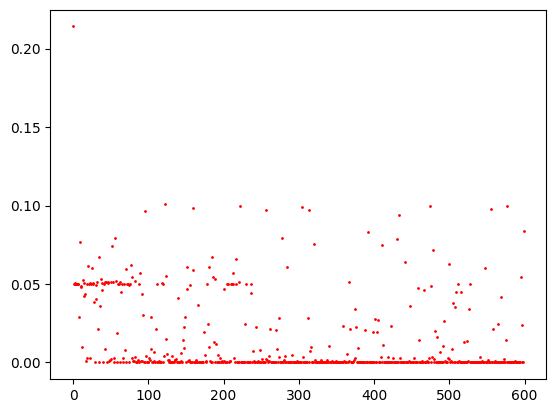

In [47]:
plt.plot(list(range(len(c))), c, 'ro', markersize=1)

In [115]:
correct = 0
for i in range(len(test_data)):
    x = test_data[i][0]
    y = test_data[i][1]
    a,z = handwritten_digit_network.feedforward(x)
    x_out = a[-1]
    if np.argmax(x_out) == np.argmax(y):
        correct +=1
print("accuracy: ", correct, len(test_data))

accuracy:  9179 10000


In [81]:
so = training_data
fold = np.int(len(so)*0.1)

/tmp/ipykernel_5236/3321811196.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold = np.int(len(so)*0.1)


In [82]:
fold

6000

In [ ]:
for i in range(0,len(so),fold):
    temp = so
    o = temp[i:i+fold]
    for k in o:
        temp.remove(k)
    p = temp
    print("o: {}\np: {}".format(o,p))